In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

MessageError: ignored

In [ ]:
!pip install skfeature-chappers

     |████████████████████████████████| 66 kB 2.4 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import KFold
from skfeature.function.similarity_based import fisher_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2
from sklearn.linear_model import LinearRegression
import time

In [ ]:
def load_data():
    data = pd.read_csv('/content/gdrive/MyDrive/Homework5/data.csv', sep=',')
    data = data.drop(columns=['PID'])
    headers = data.columns
    data = data.to_numpy(na_value=np.nan)
    return data, headers

In [ ]:
def imputation(strategy):
    data, headers = load_data()
    imp = SimpleImputer(missing_values=np.nan, strategy=strategy)
    imp.fit(data)
    data = imp.transform(data)
    df = pd.DataFrame(data, columns=headers)
    return df

In [ ]:
def forward_selection(data, classifier, num_features):
    y = data["StateAnxiety"]
    X = data.drop(columns=['StateAnxiety', 'Language'])
    sfs = SFS(classifier, n_features_to_select=num_features, direction='forward',
              scoring='r2')
    sfs.fit(X, y)
    return sfs.transform(X), sfs.get_support(indices=True)

In [ ]:
def fisher_visualize(data):
    y = data["StateAnxiety"]
    X = data.drop(columns=['StateAnxiety', 'Language'])
    cols = X.columns
    X = X.to_numpy()
    y = y.to_numpy()
    ranks = fisher_score.fisher_score(X, y)
    feat_importances = pd.Series(ranks, cols)
    feat_importances.plot(kind='barh')
    plt.show()

In [ ]:
def fisher(data):
    y = data["StateAnxiety"]
    X = data.drop(columns=['StateAnxiety', 'Language'])
    cols = X.columns
    X = X.to_numpy()
    y = y.to_numpy()
    ranks = fisher_score.fisher_score(X, y)
    idx = np.argsort(ranks, 0)[::-1]
    return idx

In [ ]:
data = imputation("mean")

In [ ]:
wrapper_scores = []
wrapper_features = []
wrapper_times = []
for d in range(1, len(data.columns) - 2):
  time_start = time.perf_counter()
  print("Number of Features: %d ----------------------------" % d)
  data_set, features = forward_selection(data, LinearRegression(), d)
  wrapper_features.append(data.columns[features])
  cv = KFold(n_splits=5, shuffle=False)
  errors = 0.0
  folds = 0
  for train_index, test_index in cv.split(data_set):
    folds += 1
    print("Fold: %d --------------------------" % folds)
    train_x, test_x = data_set[train_index], data_set[test_index]
    train_y, test_y = data['StateAnxiety'].iloc[train_index], data['StateAnxiety'].iloc[test_index]
    train_y, test_y = train_y.to_numpy(), test_y.to_numpy()

    model = Sequential(
        [Dense(32, activation='relu', input_shape=(d,), activity_regularizer=l2(0.0001)),
         Dense(64, activation='relu', activity_regularizer=l2(0.0001)),
         Dense(32, activation='relu', activity_regularizer=l2(0.0001)),
         Dense(1)]
    )
    optimizer = RMSprop(0.001)
    model.compile(optimizer=optimizer, loss='mse',metrics=['mse'])
    model.fit(train_x, train_y, epochs=30)
    preds = model.predict(test_x)
    error = np.mean(abs(test_y - preds))
    errors += error
  avg_error = errors / 5
  time_end = (time.perf_counter() - time_start)
  wrapper_scores.append(avg_error)
  wrapper_times.append(time_end)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 10/30
2/2 [==============================] - 0s 10ms/step - loss: 124.2540 - mse: 121.4001
Epoch 11/30
2/2 [==============================] - 0s 12ms/step - loss: 124.5730 - mse: 121.6965
Epoch 12/30
2/2 [==============================] - 0s 15ms/step - loss: 123.9355 - mse: 121.1053
Epoch 13/30
2/2 [==============================] - 0s 15ms/step - loss: 122.0785 - mse: 119.2245
Epoch 14/30
2/2 [==============================] - 0s 10ms/step - loss: 121.3537 - mse: 118.4832
Epoch 15/30
2/2 [==============================] - 0s 14ms/step - loss: 121.8462 - mse: 118.9863
Epoch 16/30
2/2 [==============================] - 0s 15ms/step - loss: 121.8606 - mse: 119.0269
Epoch 17/30
2/2 [==============================] - 0s 11ms/step - loss: 121.0229 - mse: 118.1745
Epoch 18/30
2/2 [==============================] - 0s 14ms/step - loss: 120.1136 - mse: 117.2859
Epoch 19/30
2/2 [==============================] - 0s 13ms/step - loss: 119.9862 - mse: 117

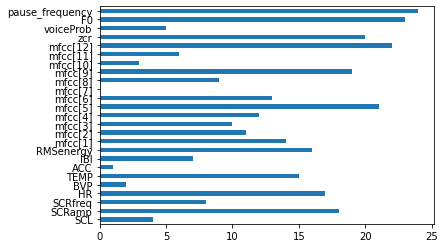

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 10/30
2/2 [==============================] - 0s 10ms/step - loss: 141.4141 - mse: 138.8027
Epoch 11/30
2/2 [==============================] - 0s 10ms/step - loss: 137.5120 - mse: 134.8776
Epoch 12/30
2/2 [==============================] - 0s 12ms/step - loss: 139.9144 - mse: 137.3113
Epoch 13/30
2/2 [==============================] - 0s 12ms/step - loss: 148.4333 - mse: 145.7498
Epoch 14/30
2/2 [==============================] - 0s 14ms/step - loss: 133.8843 - mse: 131.2520
Epoch 15/30
2/2 [==============================] - 0s 10ms/step - loss: 135.9579 - mse: 133.3662
Epoch 16/30
2/2 [==============================] - 0s 12ms/step - loss: 143.9808 - mse: 141.3062
Epoch 17/30
2/2 [==============================] - 0s 12ms/step - loss: 136.2118 - mse: 133.5989
Epoch 18/30
2/2 [==============================] - 0s 16ms/step - loss: 148.9371 - mse: 146.3953
Epoch 19/30
2/2 [==============================] - 0s 11ms/step - loss: 132.9577 - mse: 130

In [ ]:
filter_scores = []
filter_features = []
filter_times = []
fisher_visualize(data)
for d in range(1, len(data.columns) - 1):
  time_start = time.perf_counter()
  print("Number of Features: %d ----------------------------" % d)
  idx = fisher(data)
  filtered_data = data.drop(columns=['StateAnxiety', 'Language']).to_numpy()
  filter_features.append(data.columns[idx[0:d]])
  data_set = filtered_data[:, idx[0:d]]
  cv = KFold(n_splits=5, shuffle=False)
  errors = 0.0
  folds = 0
  for train_index, test_index in cv.split(data_set):
    folds += 1
    print("Fold: %d --------------------------" % folds)
    train_x, test_x = data_set[train_index], data_set[test_index]
    train_y, test_y = data['StateAnxiety'].iloc[train_index], data['StateAnxiety'].iloc[test_index]
    train_y, test_y = train_y.to_numpy(), test_y.to_numpy()

    model = Sequential(
        [Dense(32, activation='relu', input_shape=(d,), activity_regularizer=l2(0.0001)),
         Dense(64, activation='relu', activity_regularizer=l2(0.0001)),
         Dense(32, activation='relu', activity_regularizer=l2(0.0001)),
         Dense(1)]
    )
    optimizer = RMSprop(0.001)
    model.compile(optimizer=optimizer, loss='mse',metrics=['mse'])
    model.fit(train_x, train_y, epochs=30)
    preds = model.predict(test_x)
    error = np.mean(abs(test_y - preds))
    errors += error
  avg_error = errors / 5
  time_end = (time.perf_counter() - time_start)
  filter_scores.append(avg_error)
  filter_times.append(time_end)

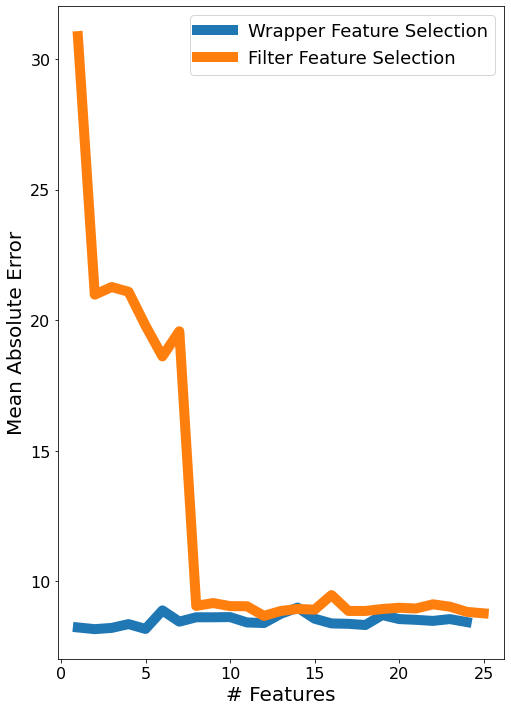

In [ ]:
plt.figure(figsize=(8,12))
plt.xlabel('# Features', fontsize=20)
plt.ylabel('Mean Absolute Error', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(range(1, len(data.columns) - 2), wrapper_scores,
         label='Wrapper Feature Selection', linewidth=10.0)
plt.plot(range(1, len(data.columns) - 1), filter_scores,
         label='Filter Feature Selection', linewidth=10.0)
plt.legend(prop={"size":18})
plt.show()

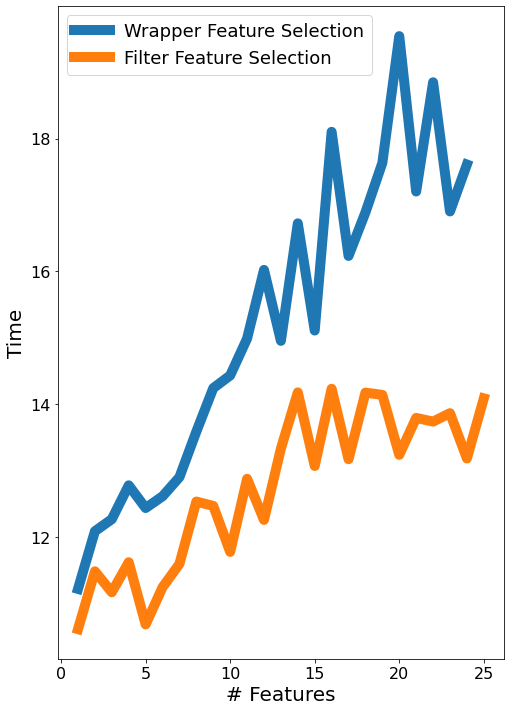

In [ ]:
plt.figure(figsize=(8,12))
plt.xlabel('# Features', fontsize=20)
plt.ylabel('Time', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(range(1, len(data.columns) - 2), wrapper_times,
         label='Wrapper Feature Selection', linewidth=10.0)
plt.plot(range(1, len(data.columns) - 1), filter_times,
         label='Filter Feature Selection', linewidth=10.0)
plt.legend(loc=2, prop={"size":18})
plt.show()

In [ ]:
wrapper_idx = np.argmin(wrapper_scores)
filter_idx = np.argmin(filter_scores)
print("Wrapper")
print("# Features: %d" % len(wrapper_features[wrapper_idx]))
print("Features:")
print(wrapper_features[wrapper_idx])
print("Average Absolute Error: %f" % wrapper_scores[wrapper_idx])
print("Time: %f" % wrapper_times[wrapper_idx])
print()
print("Filter")
print("# Features: %d" % len(filter_features[filter_idx]))
print("Features:")
print(filter_features[filter_idx])
print("Average Absolute Error: %f" % filter_scores[filter_idx])
print("Time: %f" % filter_times[filter_idx])

Wrapper
# Features: 2
Features:
Index(['SCL', 'ACC'], dtype='object')
Average Absolute Error: 8.175200
Time: 12.087914

Filter
# Features: 12
Features:
Index(['pause_frequency', 'F0', 'mfcc[12]', 'mfcc[5]', 'zcr', 'mfcc[9]',
       'SCRamp', 'HR', 'RMSenergy', 'TEMP', 'mfcc[1]', 'mfcc[6]'],
      dtype='object')
Average Absolute Error: 8.683853
Time: 12.257888


In [ ]:
!pip install lime

In [ ]:
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split

In [ ]:
X = data[wrapper_features[wrapper_idx]]
y = data['StateAnxiety']

train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.80)

In [ ]:
X = data[wrapper_features[wrapper_idx]]
y = data['StateAnxiety']
cols = X.columns
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.80)

model_wrapper = Sequential(
        [Dense(32, activation='relu', input_shape=(len(wrapper_features[wrapper_idx]),), activity_regularizer=l2(0.0001)),
         Dense(64, activation='relu', activity_regularizer=l2(0.0001)),
         Dense(32, activation='relu', activity_regularizer=l2(0.0001)),
         Dense(1)]
)
optimizer = RMSprop(0.001)
model_wrapper.compile(optimizer=optimizer, loss='mse',metrics=['mse'])
model_wrapper.fit(train_x, train_y, epochs=30)

Epoch 1/30
2/2 [==============================] - 1s 11ms/step - loss: 1889.9172 - mse: 1889.2863
Epoch 2/30
2/2 [==============================] - 0s 8ms/step - loss: 1438.6553 - mse: 1437.9941
Epoch 3/30
2/2 [==============================] - 0s 9ms/step - loss: 1177.3779 - mse: 1176.6765
Epoch 4/30
2/2 [==============================] - 0s 9ms/step - loss: 988.0040 - mse: 987.2614
Epoch 5/30
2/2 [==============================] - 0s 9ms/step - loss: 818.4174 - mse: 817.6291
Epoch 6/30
2/2 [==============================] - 0s 8ms/step - loss: 670.4856 - mse: 669.6469
Epoch 7/30
2/2 [==============================] - 0s 7ms/step - loss: 549.1899 - mse: 548.3010
Epoch 8/30
2/2 [==============================] - 0s 11ms/step - loss: 449.1601 - mse: 448.2177
Epoch 9/30
2/2 [==============================] - 0s 8ms/step - loss: 373.4254 - mse: 372.4336
Epoch 10/30
2/2 [==============================] - 0s 9ms/step - loss: 301.0748 - mse: 300.0284
Epoch 11/30
2/2 [========================

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(train_x.to_numpy(), feature_names=cols, class_names=['StateAnxiety'], verbose=True, mode='regression')
i = 1
exp = explainer.explain_instance(test_x.to_numpy()[i], model_wrapper.predict, num_features=25)

Intercept 45.06241406944561
Prediction_local [43.58451805]
Right: 43.089603


In [ ]:
exp.show_in_notebook(show_table=True)

In [ ]:
exp.as_list()

[('ACC <= 63.65', -1.148291065005208), ('SCL > 1.64', -0.32960495941428225)]

In [ ]:
filter_scores

[30.876037946906262,
 20.980107188071543,
 21.27190380668582,
 21.089551377303742,
 19.793466482287997,
 18.616252479518195,
 19.578220202122253,
 9.064901756284286,
 9.174096923258313,
 9.057059281427707,
 9.051715008957801,
 8.68385255344789,
 8.870599829023096,
 8.948808166672048,
 8.920626663614348,
 9.478864498272706,
 8.871963151617084,
 8.871095316279433,
 8.9461721216534,
 8.994711156821158,
 8.965320729143874,
 9.126298532290381,
 9.035413862216133,
 8.836555907381102,
 8.780357919674895]

In [ ]:
X = data[filter_features[filter_idx]]
y = data['StateAnxiety']
cols = X.columns
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.80)

model_filter = Sequential(
        [Dense(32, activation='relu', input_shape=(len(X.columns),), activity_regularizer=l2(0.0001)),
         Dense(64, activation='relu', activity_regularizer=l2(0.0001)),
         Dense(32, activation='relu', activity_regularizer=l2(0.0001)),
         Dense(1)]
)
optimizer = RMSprop(0.001)
model_filter.compile(optimizer=optimizer, loss='mse',metrics=['mse'])
model_filter.fit(train_x, train_y, epochs=30)

Epoch 1/30
2/2 [==============================] - 1s 10ms/step - loss: 2632.2178 - mse: 2631.1938
Epoch 2/30
2/2 [==============================] - 0s 9ms/step - loss: 2144.8591 - mse: 2143.8682
Epoch 3/30
2/2 [==============================] - 0s 13ms/step - loss: 1869.1193 - mse: 1868.1097
Epoch 4/30
2/2 [==============================] - 0s 9ms/step - loss: 1589.4187 - mse: 1588.3723
Epoch 5/30
2/2 [==============================] - 0s 10ms/step - loss: 1303.6588 - mse: 1302.5593
Epoch 6/30
2/2 [==============================] - 0s 16ms/step - loss: 1062.6281 - mse: 1061.4565
Epoch 7/30
2/2 [==============================] - 0s 9ms/step - loss: 835.3750 - mse: 834.1240
Epoch 8/30
2/2 [==============================] - 0s 9ms/step - loss: 615.3447 - mse: 613.9875
Epoch 9/30
2/2 [==============================] - 0s 11ms/step - loss: 437.6296 - mse: 436.1640
Epoch 10/30
2/2 [==============================] - 0s 11ms/step - loss: 299.7333 - mse: 298.1602
Epoch 11/30
2/2 [==============

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(train_x.to_numpy(), feature_names=cols, class_names=['StateAnxiety'], verbose=True, mode='regression')
i = 1
exp = explainer.explain_instance(test_x.to_numpy()[i], model_filter.predict, num_features=25)
exp.show_in_notebook(show_table=True)
exp.as_list()

Intercept 46.90103934516803
Prediction_local [50.25859733]
Right: 50.574898


[('66.70 < F0 <= 97.72', 1.4896393392916425),
 ('86.32 < HR <= 94.76', 1.0495764396802791),
 ('mfcc[6] > -9.91', 0.6635060292385626),
 ('33.17 < TEMP <= 33.93', 0.3134996195854521),
 ('0.02 < SCRamp <= 0.05', -0.2692292431561075),
 ('mfcc[5] <= -2.99', 0.2619157138898556),
 ('pause_frequency <= 1.74', -0.2506112942721509),
 ('mfcc[1] > -2.98', 0.21526183875835372),
 ('RMSenergy > 0.01', -0.05137582786267384),
 ('mfcc[9] > -3.78', -0.04755253482864215),
 ('0.07 < zcr <= 0.09', -0.012502150721949367),
 ('mfcc[12] <= -2.29', -0.004569948572927831)]

In [ ]:
wrapper_idx = 14
print("Wrapper")
print("# Features: %d" % len(wrapper_features[wrapper_idx]))
print("Features:")
print(wrapper_features[wrapper_idx])
print("Average Absolute Error: %f" % wrapper_scores[wrapper_idx])
print("Time: %f" % wrapper_times[wrapper_idx])
print()
filter_idx = 14
print("Filter")
print("# Features: %d" % len(filter_features[filter_idx]))
print("Features:")
print(filter_features[filter_idx])
print("Average Absolute Error: %f" % filter_scores[filter_idx])
print("Time: %f" % filter_times[filter_idx])

Wrapper
# Features: 15
Features:
Index(['SCL', 'SCRamp', 'SCRfreq', 'HR', 'BVP', 'TEMP', 'ACC', 'mfcc[1]',
       'mfcc[2]', 'mfcc[7]', 'mfcc[8]', 'mfcc[9]', 'mfcc[11]', 'zcr',
       'pause_frequency'],
      dtype='object')
Average Absolute Error: 8.436405
Time: 17.758474

Filter
# Features: 15
Features:
Index(['pause_frequency', 'F0', 'mfcc[12]', 'mfcc[5]', 'zcr', 'mfcc[9]',
       'SCRamp', 'HR', 'RMSenergy', 'TEMP', 'mfcc[1]', 'mfcc[6]', 'mfcc[4]',
       'mfcc[2]', 'mfcc[3]'],
      dtype='object')
Average Absolute Error: 9.033522
Time: 13.641110
